# **A11.2020.12610 - Nur Ryan Dwi Cahyo** - **BKDS06**

PROJECT BK BENGKEL KODING

# 1. Pengumpulan Data

Dataset yang digunakan adalah dataset yang bersumber dari link berikut : https://archive.ics.uci.edu/dataset/45/heart+disease

Extract dan gunakan **Hungarian.data** untuk melakukan Pre-Processing

## 2. Menelaah Data

Dalam studi ini yang dibutuhkan dalam penelaahan data hingga pembersihan data menggunaakn Library Pandas, re, numpy, dan itertools

In [4]:
import pandas as pd
import re
import numpy as np
import itertools

Kode dibawah ini memanggil fungsi 'mount' dari pustaka drive yang telah diimpor sebelumnya. Fungsi 'mount' digunakan untuk menghubungkan (atau "mounting") Google Drive Anda ke Colab.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


dibawah ini merupakan direktori drive yang digunakan, 'dir' adalah variabel dari direktori dataset nya..

In [6]:
dir = '/content/drive/MyDrive/BK_A11.2020.12610/hungarian.data'



**with open(dir, encoding='latin1') as file::**
Baris ini adalah perintah untuk membuka dan mengelola file. Dengan perintah ini, tidak perlu khawatir tentang menutup file setelah selesai membacanya, karena file akan ditutup secara otomatis.

**open(dir, encoding='latin1')** membuka file yang alamatnya diberikan oleh variabel dir dengan encoding 'latin1'. Encoding 'latin1' adalah salah satu jenis encoding karakter yang sering digunakan.

**lines = [line.strip() for line in file]:**
Baris ini membaca setiap baris dari file yang dibuka dan memasukkannya ke dalam list lines.
line.strip() digunakan untuk menghapus spasi kosong dan karakter newline (baris baru) dari setiap baris.

**lines[0:10]:**
Ini adalah slicing dari list lines, yang akan mengembalikan 10 elemen pertama dari list tersebut.

In [7]:
with open (dir, encoding='latin1') as file:
  lines = [line.strip() for line in file]

  lines[0:10]

Kode dibawah ini mengambil data dari sebuah generator yang menghasilkan list 10 elemen dari lines dengan interval 10 elemen setiap kali. Kemudian, **itertools.takewhile()** digunakan untuk mengambil elemen dari generator tersebut yang memiliki panjang tepat 76 karakter. Secara lebih rinci, **(' '.join(lines[i:(i+10)]).split() for i in range(0, len(lines), 10))** adalah generator yang mengambil setiap 10 baris dari lines, menggabungkannya menjadi satu string dengan spasi sebagai pemisah, lalu membaginya kembali menjadi list kata-kata. F**ungsi itertools.takewhile()** kemudian beroperasi pada generator ini, mengambil semua list yang memiliki panjang tepat 76 karakter, dan menyimpannya dalam variabel data.

Keseluruhan pada pre-processing berikut ini di simpan pada variabel 'data'

In [8]:
data = itertools.takewhile(
    lambda x: len(x) ==76,
    (' '.join(lines[i:(i+10)]).split() for i in range (0, len(lines),10))
)

dibawah ini merupakan proses untuk Menampilkan isi/record dalam bentuk 'head' dimana fungsi 'head' adalah menampilkan record dari atas

In [9]:
df = pd.DataFrame.from_records(data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


dibawah ini merupakan perintah untuk menampilkan informasi pada keseluruhan isi pada datasets

In [10]:
df.info

<bound method DataFrame.info of        0  1   2  3  4  5  6   7  8    9   ...  66  67 68 69 70 71 72   73  \
0    1254  0  40  1  1  0  0  -9  2  140  ...  -9  -9  1  1  1  1  1  -9.   
1    1255  0  49  0  1  0  0  -9  3  160  ...  -9  -9  1  1  1  1  1  -9.   
2    1256  0  37  1  1  0  0  -9  2  130  ...  -9  -9  1  1  1  1  1  -9.   
3    1257  0  48  0  1  1  1  -9  4  138  ...   2  -9  1  1  1  1  1  -9.   
4    1258  0  54  1  1  0  1  -9  3  150  ...   1  -9  1  1  1  1  1  -9.   
..    ... ..  .. .. .. .. ..  .. ..  ...  ...  ..  .. .. .. .. .. ..  ...   
289  1053  0  48  0  0  0  0  -9  2   -9  ...  -9  -9  1  1  1  1  1  -9.   
290  1054  0  36  1  1  0  0  -9  2  120  ...  -9  -9  1  1  1  1  1  -9.   
291  5001  0  48  1  0  0  0  -9  3  110  ...  -9  -9  1  1  1  1  1  -9.   
292  5000  0  47  0  0  0  0  -9  2  140  ...  -9  -9  1  1  1  1  1  -9.   
293  5002  0  53  1  1  1  1  -9  4  130  ...   1   1  1  1  1  1  1  -9.   

      74    75  
0    -9.  name  
1    -9. 

dibawah ini merupakan serangkaian operasi dilakukan pada sebuah DataFrame df. Pertama, dengan **df = df.iloc[:,:-1]**, kode tersebut mengambil semua baris dan kolom dari df kecuali kolom terakhir, sehingga mengurangi satu kolom dari DataFrame. Kemudian, dengan **df = df.drop(df.columns[0], axis=1)**, kolom pertama dari df dihapus. Setelah itu, dengan perintah **df = df.astype(float)**, semua nilai dalam DataFrame diubah menjadi tipe data float untuk memastikan bahwa semuanya berupa angka desimal.

In [11]:
df = df.iloc[:,:-1]
df = df.drop(df.columns[0], axis=1)
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       294 non-null    float64
 7   8       294 non-null    float64
 8   9       294 non-null    float64
 9   10      294 non-null    float64
 10  11      294 non-null    float64
 11  12      294 non-null    float64
 12  13      294 non-null    float64
 13  14      294 non-null    float64
 14  15      294 non-null    float64
 15  16      294 non-null    float64
 16  17      294 non-null    float64
 17  18      294 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      294 non-null    float64
 22  23

Baris **df.replace(-9.0, np.nan, inplace=True)** memiliki tujuan untuk menggantikan semua nilai yang memiliki nilai **-9.0** dalam dataframe df dengan nilai NaN (Not a Number) yang diberikan oleh pustaka NumPy (dengan alias np). Parameter **inplace=True** berarti perubahan tersebut akan diterapkan langsung pada dataframe df tanpa perlu menugaskan hasil kembali ke variabel. Dengan mengganti nilai **-9.0** dengan **NaN**

In [12]:
df.replace(-9.0, np.nan, inplace=True)

perintah **df.isnull()** akan mengembalikan DataFrame df dengan nilai boolean (True/False) yang menunjukkan di mana setiap elemen dalam DataFrame tersebut adalah **null atau tidak**

In [14]:
df.isnull().sum()

1       0
2       0
3       0
4       0
5       0
     ... 
70      0
71      0
72      0
73    266
74    294
Length: 74, dtype: int64

perintah untuk inspect value berdasarkan 'head' data teratas

In [16]:
df.head()


,1,2,3,4,5,6,7,8,9,10,...,65,66,67,68,69,70,71,72,73,74
0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,1.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,0.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,0.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,0.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 74 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       294 non-null    float64
 1   2       294 non-null    float64
 2   3       294 non-null    float64
 3   4       294 non-null    float64
 4   5       294 non-null    float64
 5   6       294 non-null    float64
 6   7       0 non-null      float64
 7   8       294 non-null    float64
 8   9       293 non-null    float64
 9   10      293 non-null    float64
 10  11      271 non-null    float64
 11  12      12 non-null     float64
 12  13      1 non-null      float64
 13  14      0 non-null      float64
 14  15      286 non-null    float64
 15  16      21 non-null     float64
 16  17      1 non-null      float64
 17  18      293 non-null    float64
 18  19      294 non-null    float64
 19  20      294 non-null    float64
 20  21      294 non-null    float64
 21  22      293 non-null    float64
 22  23


Kode **df_selected = df.iloc[:, [1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]]** digunakan untuk memilih kolom-kolom tertentu dari DataFrame df dengan menggunakan metode iloc yang berbasis indeks posisi. Dalam konteks ini, kolom-kolom yang dipilih ditentukan oleh indeks kolomnya, yang diberikan dalam daftar **[1, 2, 7, 8, 10, 14, 17, 30, 36, 38, 39, 42, 49, 56]**. Tanda titik dua pertama menunjukkan bahwa semua baris dari DataFrame akan dipertahankan, sedangkan daftar indeks di dalam tanda kurung siku menentukan kolom-kolom yang ingin diambil. Sebagai hasilnya, df_selected akan berisi DataFrame yang hanya terdiri dari kolom-kolom dengan indeks posisi yang telah ditentukan dari df.

In [18]:
df_selected = df.iloc[:, [1, 2, 7,8,10,14,17,30,36,38,39,42,49,56]]

In [19]:
df_selected.head()

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [20]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


Kode dibawah mendefinisikan sebuah dictionary yang disebut **column_mapping**, di mana kunci-kuncinya adalah indeks kolom tertentu dan nilainya adalah label nama untuk kolom tersebut. Misalnya, indeks 2 akan direpresentasikan dengan label 'age'. Setelah mendefinisikan column_mapping, kode selanjutnya mengubah nama kolom dari DataFrame **df_selected** berdasarkan mapping yang telah didefinisikan. Dengan menggunakan metode rename dengan parameter **columns=column_mapping dan inplace=True**, kolom-kolom di DataFrame akan diperbarui dengan nama yang sesuai dengan mapping yang telah ditentukan. Sebagai hasilnya, setelah eksekusi kode ini, kolom-kolom di DataFrame akan memiliki nama baru sesuai dengan definisi di column_mapping.

BISA JUGA DISEBUT LABELING

In [22]:
column_mapping = {
  2: 'age',
  3: 'sex',
  8: 'cp',
  9: 'trestbps',
  11: 'chol',
  15: 'fbs',
  18: 'restecg',
  31: 'thalach',
  37: 'exang',
  39: 'oldpeak',
  40: 'slope',
  43: 'ca',
  50: 'thal',
  57: 'target'
}
df_selected.rename(columns=column_mapping, inplace=True)


<ipython-input-22-893b44d1a954>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=column_mapping, inplace=True)


In [23]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


Kode **df_selected.value_counts()** digunakan untuk menghitung frekuensi kemunculan setiap unik nilai di setiap kolom dari DataFrame df_selected. Dengan kata lain, fungsi **value_counts()** akan memeriksa setiap kolom dalam d**f_selected** dan menghitung berapa kali setiap nilai unik muncul di kolom tersebut. Hasilnya adalah serangkaian output yang menunjukkan nilai unik beserta jumlah kemunculannya dalam setiap kolom dari **df_selected**

In [24]:
df_selected.value_counts()

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  target
47.0  1.0  4.0  150.0     226.0  0.0  0.0      98.0     1.0    1.5      2.0    0.0  7.0   1.0       1
dtype: int64

In [25]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

In [26]:
df_selected.isnull().sum()

age           0
sex           0
cp            0
trestbps      1
chol         23
fbs           8
restecg       1
thalach       1
exang         1
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

Kode ini berfokus pada pengolahan data dalam beberapa kolom spesifik dari DataFrame **df_selected**. Pertama, setiap variabel seperti **meanTBPS, meanChol, meanfbs, meanRestCG, meanthalach, dan meanexang** mendapatkan nilai dari kolom yang sesuai dalam **df_selected**, dengan menghapus nilai-nilai yang kosong menggunakan metode **dropna()**. Setelah itu, setiap variabel tersebut dikonversi menjadi tipe data float menggunakan metode **astype(float)**. Setelah mengkonversi, nilai rata-rata dari setiap kolom tersebut dihitung dan dibulatkan ke bilangan bulat terdekat dengan menggunakan fungsi **round()**. Hasil akhirnya adalah nilai rata-rata dari setiap kolom tersebut, yang akan digunakan atau ditampilkan sesuai kebutuhan analisis.

In [28]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()

meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())


Kode ini berfokus pada pengisian nilai-nilai yang hilang (NaN) dalam DataFrame **df_selected** dengan nilai rata-rata yang telah dihitung sebelumnya untuk kolom tertentu. Pertama, sebuah dictionary yang disebut **fill_values** dibuat. Dictionary ini memiliki kunci-kunci yang sesuai dengan nama kolom dari DataFrame, dan setiap kunci diisi dengan nilai rata-rata yang telah dihitung sebelumnya untuk kolom tersebut. Setelah itu, menggunakan metode **fillna()**, setiap nilai NaN dalam **df_selected** akan diganti dengan nilai rata-rata yang sesuai berdasarkan dictionary **fill_values**. DataFrame yang telah diisi dengan nilai-nilai baru ini disimpan dalam variabel **dfClean**. Terakhir, dengan menggunakan **dfClean.info()**, informasi ringkas tentang DataFrame yang telah dibersihkan ini ditampilkan, termasuk informasi tentang jumlah baris, kolom, tipe data, dan jumlah nilai non-null di setiap kolom.

In [29]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)
dfClean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [30]:
dfClean.isnull().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope       190
ca          290
thal        266
target        0
dtype: int64

kode untuk membersihkan data yang duplikat, based on rows

In [31]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0.0


kode untuk membersihkan data yang duplikat, based on rows

In [32]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]


All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0.0


kode untuk membersihkan data yang duplikat, based on rows

In [35]:
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]



All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [36]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0


In [37]:
dfClean['target'].value_counts()

0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: target, dtype: int64

Import library seaborn dan matplotlib

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


Kode **dfClean.corr()** digunakan untuk menghitung korelasi antara semua pasangan kolom dalam DataFrame **dfClean**.

In [39]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,-0.068000,-0.365148,0.274092,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.213921,-1.000000,-0.130013,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.392841,0.333333,-0.048622,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.039558,0.471405,0.206153,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.116098,0.170069,-0.100422,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.197872,NaN,0.149895,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,-0.031222,NaN,-0.188991,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.182320,-0.051537,-0.456133,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.440633,0.577350,0.181142,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.121817,0.333333,0.116806,0.580732


Membuat visualisasi pada data diatas

<Axes: >

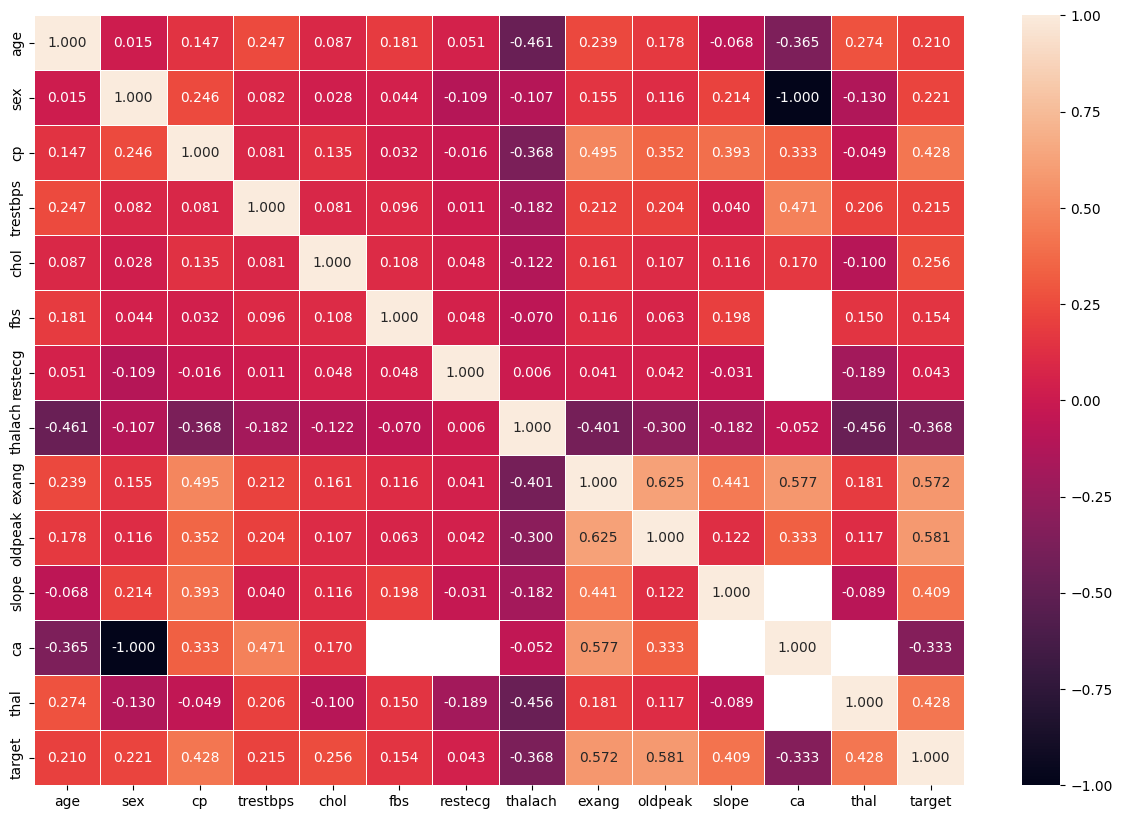

In [40]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")
